In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, auc,accuracy_score,precision_score, f1_score, cohen_kappa_score, recall_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score
import numpy as np
from inspect import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn import metrics
import pydotplus
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [3]:
target_names=['Not Fraud 0', 'Fraud 1']

In [4]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [5]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape


(1848, 1)

In [6]:
X_test = pd.read_csv("../3. Data Preparation/X_test.csv", index_col=0)
X_test.shape

(56962, 30)

In [7]:
y_test = pd.read_csv("../3. Data Preparation/y_test.csv", index_col=0, header=0)
y_test.shape

(56962, 1)

In [8]:
randomForestOOB12 = joblib.load('../5. Modeling - Random Forest/RandomForest (OOB_12 Features - Optimal Parameters).pkl')

In [9]:
adaBoostAllFeatures = joblib.load('../7. Modeling - DecisionTree AdaBoost/AdaBoost Classifier.pkl')

In [10]:
xgb = joblib.load('../9. XBoost/XGBoost.pkl')

In [11]:
ensemble = joblib.load('../11. Ensemble Classifier/EnsembleClassifier with Best Model(recall).pkl')

In [12]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)


# Random Forest OOB 12

In [13]:
randomForestOOB12.fit(X_train_resampled, y_train_resampled)
y_pred_test_Random = randomForestOOB12.predict(X_test)

C:\Users\Pappa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [14]:
y_pred_test_Random.shape

(56962,)

Confusion matrix, without normalization
[[56721   154]
 [   17    70]]


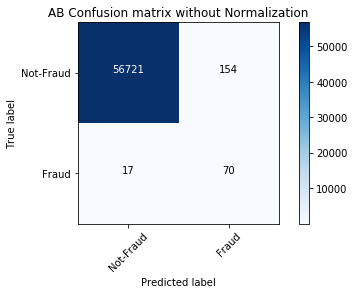

Normalized confusion matrix
[[1.  0. ]
 [0.2 0.8]]


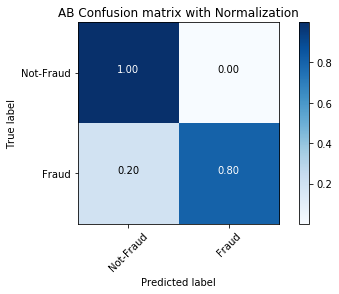

In [15]:
cm = confusion_matrix(y_test['Class'].values, y_pred_test_Random)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'AB Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'AB Confusion matrix with Normalization')
plt.show()


In [16]:

acc= accuracy_score( y_test['Class'].values, y_pred_test_Random)
recall = recall_score( y_test['Class'].values, y_pred_test_Random, average='binary')
precision = precision_score( y_test['Class'].values, y_pred_test_Random)
f1 = f1_score( y_test['Class'].values, y_pred_test_Random, average='binary')
average = average_precision_score( y_test['Class'].values, y_pred_test_Random)
kappa = cohen_kappa_score( y_test['Class'].values, y_pred_test_Random)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9969979986657772
Recall score 0.8045977011494253
Precision 0.3125
f1_score 0.45016077170418
Average precision-recall score: 0.25
Kappa Score 0.44894837727055226


In [17]:
print(classification_report(y_test['Class'].values, y_pred_test_Random, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      1.00      1.00     56875
     Fraud 1       0.31      0.80      0.45        87

    accuracy                           1.00     56962
   macro avg       0.66      0.90      0.72     56962
weighted avg       1.00      1.00      1.00     56962



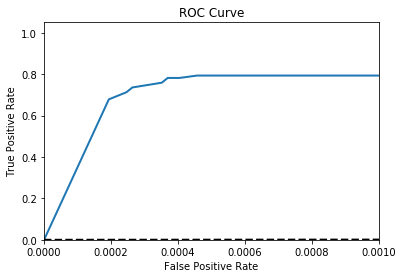

In [18]:
y_score_random = randomForestOOB12.predict_proba(X_test)[:,1]

fpr, tpr, t =roc_curve(y_test, y_score_random)
plot_roc()

def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();



fpr_random, tpr_random, t_random = fpr, tpr, t

randomauc = metrics.auc(fpr_random, tpr_random)

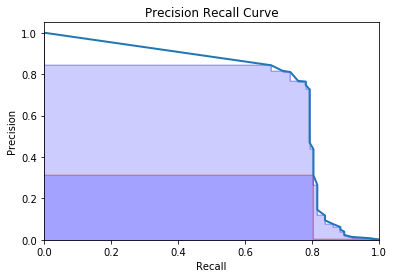

In [19]:
precision, recall, tresholds = precision_recall_curve( y_test['Class'].values, y_pred_test_Random)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_test['Class'].values, y_pred_test_Random)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average))

precision, recall, thresholds = precision_recall_curve(y_test['Class'].values, y_score_random)
precision_random, recall_random, thresholds_random = precision, recall, thresholds
plot_precision_recall()

# AdaBoost

In [20]:
adaBoostAllFeatures.fit(X_train_resampled, y_train_resampled)
y_pred_test_Ada = adaBoostAllFeatures.predict(X_test)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[56540   335]
 [   15    72]]


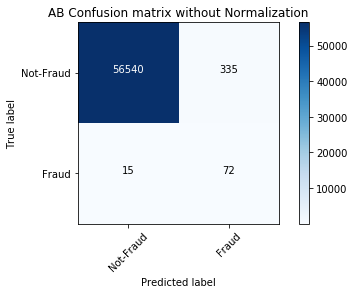

Normalized confusion matrix
[[0.99 0.01]
 [0.17 0.83]]


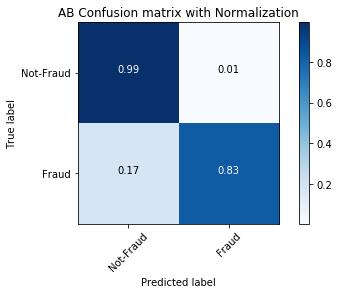

In [21]:
cm = confusion_matrix(y_test['Class'].values, y_pred_test_Ada)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'AB Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'AB Confusion matrix with Normalization')
plt.show()

In [22]:

acc= accuracy_score( y_test['Class'].values, y_pred_test_Ada)
recall = recall_score( y_test['Class'].values, y_pred_test_Ada, average='binary')
precision = precision_score( y_test['Class'].values, y_pred_test_Ada)
f1 = f1_score( y_test['Class'].values, y_pred_test_Ada, average='binary')
average = average_precision_score( y_test['Class'].values, y_pred_test_Ada)
kappa = cohen_kappa_score( y_test['Class'].values, y_pred_test_Ada)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9938555528246902
Recall score 0.8275862068965517
Precision 0.1769041769041769
f1_score 0.29149797570850206
Average precision-recall score: 0.15
Kappa Score 0.2897103897228236


In [23]:
print(classification_report(y_test['Class'].values, y_pred_test_Ada, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      0.99      1.00     56875
     Fraud 1       0.18      0.83      0.29        87

    accuracy                           0.99     56962
   macro avg       0.59      0.91      0.64     56962
weighted avg       1.00      0.99      1.00     56962



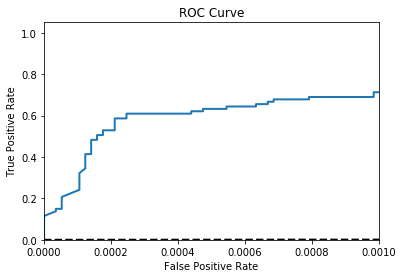

In [24]:
y_score_ada = adaBoostAllFeatures.predict_proba(X_test)[:,1]

fpr, tpr, t =roc_curve(y_test, y_score_ada)
plot_roc()

def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();



fpr_ada, tpr_ada, t_ada = fpr, tpr, t

adaauc = metrics.auc(fpr_ada, tpr_ada)

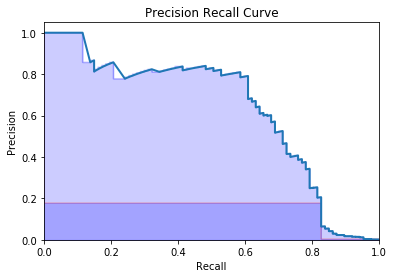

In [25]:
precision, recall, tresholds = precision_recall_curve( y_test['Class'].values, y_pred_test_Ada)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_test['Class'].values, y_pred_test_Ada)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average))

precision, recall, thresholds = precision_recall_curve(y_test['Class'].values, y_score_ada)
precision_ada, recall_ada, thresholds_ada = precision, recall, thresholds
plot_precision_recall()

# XGBoost

In [26]:
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_test_xgb = xgb.predict(X_test)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[56603   272]
 [   14    73]]


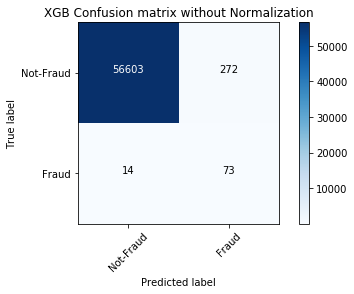

Normalized confusion matrix
[[1.   0.  ]
 [0.16 0.84]]


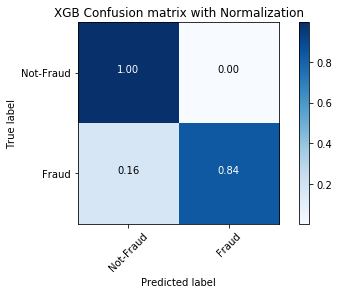

In [27]:
cm = confusion_matrix(y_test['Class'].values, y_pred_test_xgb)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'XGB Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'XGB Confusion matrix with Normalization')
plt.show()

In [28]:

acc= accuracy_score( y_test['Class'].values, y_pred_test_xgb)
recall = recall_score( y_test['Class'].values, y_pred_test_xgb, average='binary')
precision = precision_score( y_test['Class'].values, y_pred_test_xgb)
f1 = f1_score( y_test['Class'].values, y_pred_test_xgb, average='binary')
average = average_precision_score( y_test['Class'].values, y_pred_test_xgb)
kappa = cohen_kappa_score( y_test['Class'].values, y_pred_test_xgb)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.994979108879604
Recall score 0.8390804597701149
Precision 0.21159420289855072
f1_score 0.33796296296296297
Average precision-recall score: 0.18
Kappa Score 0.3363439795264326


In [29]:
print(classification_report(y_test['Class'].values, y_pred_test_Ada, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      0.99      1.00     56875
     Fraud 1       0.18      0.83      0.29        87

    accuracy                           0.99     56962
   macro avg       0.59      0.91      0.64     56962
weighted avg       1.00      0.99      1.00     56962



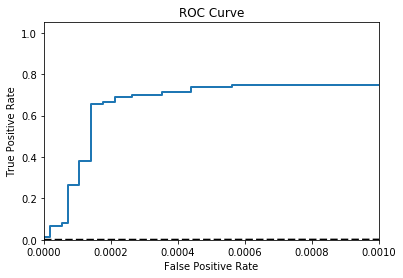

In [30]:
y_score_xgb = xgb.predict_proba(X_test)[:,1]

fpr, tpr, t =roc_curve(y_test, y_score_xgb)
plot_roc()

def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();



fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t

xgbauc = metrics.auc(fpr_xgb, tpr_xgb)

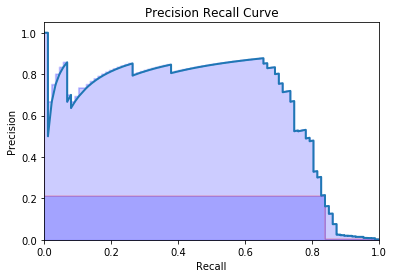

In [31]:
precision, recall, tresholds = precision_recall_curve( y_test['Class'].values, y_pred_test_xgb)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_test['Class'].values, y_pred_test_xgb)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average))

precision, recall, thresholds = precision_recall_curve(y_test['Class'].values, y_score_xgb)
precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds
plot_precision_recall()

# Ensemble Classifier

In [32]:
ensemble.fit(X_train_resampled, y_train_resampled)
y_pred_test_ensemble = ensemble.predict(X_test)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Confusion matrix, without normalization
[[56682   193]
 [   16    71]]


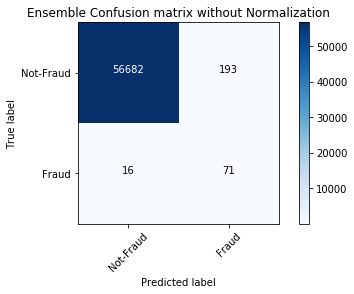

Normalized confusion matrix
[[1.   0.  ]
 [0.18 0.82]]


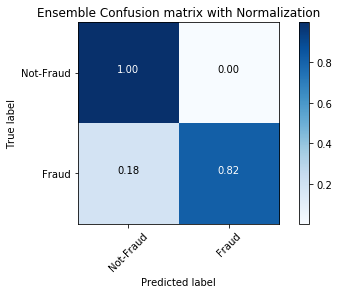

In [33]:
cm = confusion_matrix(y_test['Class'].values, y_pred_test_ensemble)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'Ensemble Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'Ensemble Confusion matrix with Normalization')
plt.show()

In [34]:

acc= accuracy_score( y_test['Class'].values, y_pred_test_ensemble)
recall = recall_score( y_test['Class'].values, y_pred_test_ensemble, average='binary')
precision = precision_score( y_test['Class'].values, y_pred_test_ensemble)
f1 = f1_score( y_test['Class'].values, y_pred_test_ensemble, average='binary')
average = average_precision_score( y_test['Class'].values, y_pred_test_ensemble)
kappa = cohen_kappa_score( y_test['Class'].values, y_pred_test_ensemble)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9963308872581721
Recall score 0.8160919540229885
Precision 0.2689393939393939
f1_score 0.4045584045584046
Average precision-recall score: 0.22
Kappa Score 0.40318721041185357


In [35]:
print(classification_report(y_test['Class'].values, y_pred_test_ensemble, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      1.00      1.00     56875
     Fraud 1       0.27      0.82      0.40        87

    accuracy                           1.00     56962
   macro avg       0.63      0.91      0.70     56962
weighted avg       1.00      1.00      1.00     56962



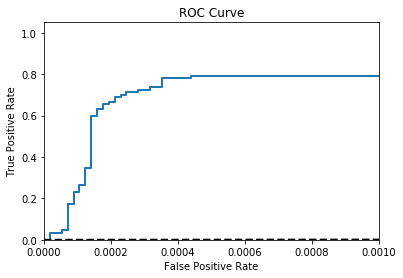

In [36]:
y_score_ensemble = ensemble.predict_proba(X_test)[:,1]

fpr, tpr, t =roc_curve(y_test, y_score_ensemble)
plot_roc()

def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();



fpr_ensemble, tpr_ensemble, t_ensemble = fpr, tpr, t

ensembleauc = metrics.auc(fpr_ensemble, tpr_ensemble)

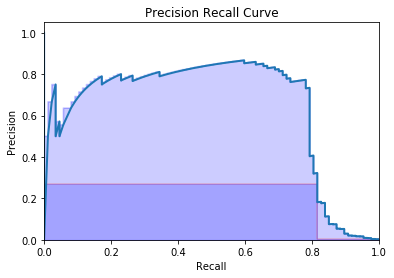

In [37]:
y_score_ensemble = ensemble.predict_proba(X_test)[:,1]
precision, recall, tresholds = precision_recall_curve( y_test['Class'].values, y_pred_test_ensemble)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
average = average_precision_score( y_test['Class'].values, y_pred_test_ensemble)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average))

precision, recall, thresholds = precision_recall_curve(y_test['Class'].values, y_score_ensemble)
precision_ensemble, recall_ensemble, thresholds_ensemble = precision, recall, thresholds
plot_precision_recall()

In [38]:
prec = precision_score(y_test['Class'], y_pred_test_ensemble)
rec = recall_score(y_test['Class'], y_pred_test_ensemble)
f1 = f1_score( y_test['Class'].values, y_pred_test_ensemble, average='binary')


print('Precision:', prec)
print('Recall:', rec)
print ('F1', f1)

Precision: 0.2689393939393939
Recall: 0.8160919540229885
F1 0.4045584045584046


In [41]:
def prec_recall_all_models () :
    plt.figure(figsize=(16, 12))
    
    plt.plot(recall_random, precision_random, linewidth = 2)
    plt.plot(recall_ada, precision_ada, linewidth = 2)
    plt.plot(recall_xgb, precision_xgb, linewidth = 2)
    plt.plot(recall_ensemble, precision_ensemble, linewidth = 2)
    
    
    plt.scatter(rec, prec, linewidth = 2, color = 'red')
    plt.axvline(rec, color = 'red', linewidth = 1, linestyle='--')
    plt.axhline(prec, color = 'red', linewidth = 1, linestyle='--')
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    #plt.title('Precision Recall Curve - PR = 0.3268 - REC = 0.8659 - F1 = 0.4745 ')
    plt.legend(['RF AUC={0:0.4f}'.format(randomauc), 'AB AUC={0:0.4f}'.format(adaauc) , 'XGB AUC={0:0.4f}'.format(xgbauc), 'Ensemble AUC={0:0.4f} '.format(ensembleauc)], loc='upper right')
    plt.savefig('Precision-Recall (4 best model).png')
    plt.show();

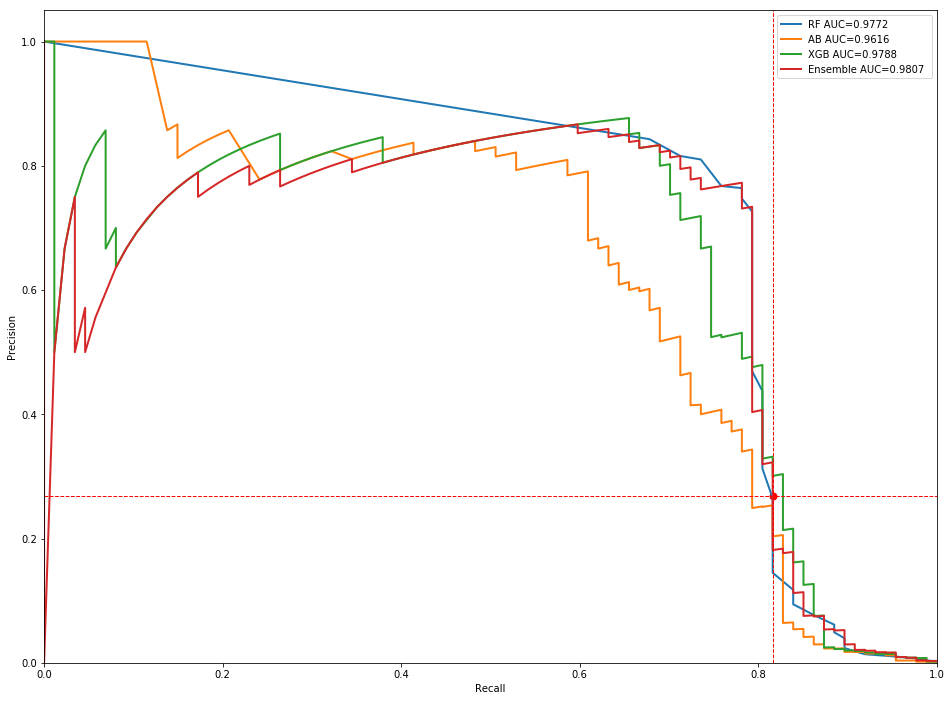

In [42]:
prec_recall_all_models()

In [43]:
def roc_curve_all_models () : 
    plt.figure(figsize=(16, 12))
    plt.plot(fpr_random, tpr_random, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_ada, tpr_ada, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_xgb, tpr_xgb, label = 'ROC curve', linewidth = 2)
    #plt.plot(fpr_ensemble, tpr_ensemble, label = 'ROC curve', linewidth = 2)
    
    
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(['RF AUC={0:0.4f}'.format(randomauc), 'AB AUC={0:0.4f}'.format(adaauc) , 'XGB AUC={0:0.4f}'.format(xgbauc)], loc='upper left')
    plt.savefig('VotingClassifier.png')
    plt.show();

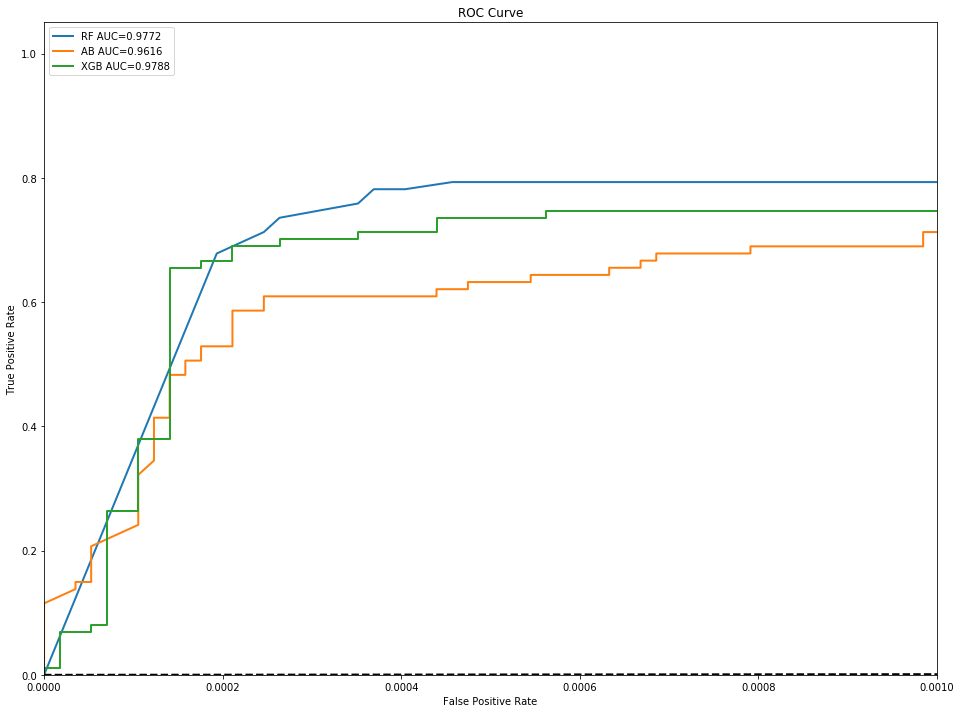

In [44]:
roc_curve_all_models()

## Interactive Plot to show the treshold value

In [ ]:
from bokeh.models import HoverTool


In [50]:



source = {} 
source['y_tpr'] = fpr_xgb
source['x_fpr'] = tpr_xgb
source['thresh'] = t_xgb
#source['auc_legend'] = randomauc*len(tpr_random)

# create custom HoverTool that will show exact values
hover_ = HoverTool(names=['ROC'], tooltips=[ ("TPR", "@y_tpr"), ("FPR", "@x_fpr"),("Thresh", "@thresh")])
# add custom HoverTool to toolbox we want with our plot
p_tools = [hover_, 'zoom_in', 'zoom_out', 'save', 'reset']
p = figure(title=f'ROC curve', tools=p_tools)


# create plot
p = figure(title=f'ROC curve', tools=p_tools)
p.xaxis.axis_label = 'False Positive Rate' 
p.yaxis.axis_label = 'True Positive Rate'
p.line([1, 0], [1, 0], line_dash='dashed', line_width=0.5, color='black', name='Chance')
# add roc curve line
p.line( 'y_tpr', 'x_fpr', line_width=1, color="blue", source=source)
# add explicit data points along line - note we apply legend here
p.circle('y_tpr', 'x_fpr', size=4, color="red", source=source, name='ROC')
# show 
show(p)

In [52]:
auc= metrics.auc(fpr_xgb, tpr_xgb)
auc1= metrics.auc(fpr_ensemble, tpr_ensemble)

In [53]:
print(auc)
print(auc1)

0.9787878236705824
0.9807384615384616


In [54]:

#p = figure(title=f'ROC curve', tools=p_tools)

source = {} 
source['y_tpr'] = fpr_xgb
source['x_fpr'] = tpr_xgb
source['thresh'] = t_xgb
#source['auc_legend'] = randomauc*len(tpr_random)

# create custom HoverTool that will show exact values
hover_ = HoverTool(names=['ROC'], tooltips=[  ("TPR", "@x_fpr"), ("FPR", "@y_tpr"),("Thresh", "@thresh")])
p_tools = [hover_, 'zoom_in', 'zoom_out', 'save', 'reset']
# add custom HoverTool to toolbox we want with our plot
#p_tools = [hover_, 'zoom_in', 'zoom_out', 'save', 'reset']

# create plot
p = figure(title=f'ROC curve', tools=p_tools)
p.xaxis.axis_label = 'False Positive Rate' 
p.yaxis.axis_label = 'True Positive Rate'
p.line([1, 0], [1, 0], line_dash='dashed', line_width=0.5, color='black', name='Chance')
# add roc curve line
p.line( 'y_tpr', 'x_fpr', line_width=1, color="blue", source=source)
# add explicit data points along line - note we apply legend here
p.circle('y_tpr', 'x_fpr', size=4, color="red", source=source, name='ROC')
# show 
show(p)